In [64]:
import pandas as pd


dataframe = pd.read_csv("Exmo_BTCEUR_1h.csv", header=1)

dataframe.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume EUR
0,1.600326e+09,2020-09-17 07-AM,BTCEUR,9246.59,9251.27,9242.75,9251.27,0.00670,61.95
1,1.600322e+09,2020-09-17 06-AM,BTCEUR,9302.08,9318.55,9242.95,9246.59,0.07678,711.82
2,1.600319e+09,2020-09-17 05-AM,BTCEUR,9281.57,9322.23,9274.79,9302.08,0.09128,848.16
3,1.600315e+09,2020-09-17 04-AM,BTCEUR,9273.26,9289.01,9259.86,9281.57,0.07866,729.78
4,1.600312e+09,2020-09-17 03-AM,BTCEUR,9307.35,9309.64,9273.26,9273.26,0.09925,922.51


In [65]:
dataframe["Open_hour_before"] = dataframe["Open"].shift(-1)
dataframe["Open_changes"] = (dataframe["Open"] / dataframe["Open_hour_before"]) - 1

dataframe = dataframe.dropna()
dataframe.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume EUR,Open_hour_before,Open_changes
0,1.600326e+09,2020-09-17 07-AM,BTCEUR,9246.59,9251.27,9242.75,9251.27,0.00670,61.95,9302.08,-0.005965
1,1.600322e+09,2020-09-17 06-AM,BTCEUR,9302.08,9318.55,9242.95,9246.59,0.07678,711.82,9281.57,0.002210
2,1.600319e+09,2020-09-17 05-AM,BTCEUR,9281.57,9322.23,9274.79,9302.08,0.09128,848.16,9273.26,0.000896
3,1.600315e+09,2020-09-17 04-AM,BTCEUR,9273.26,9289.01,9259.86,9281.57,0.07866,729.78,9307.35,-0.003663
4,1.600312e+09,2020-09-17 03-AM,BTCEUR,9307.35,9309.64,9273.26,9273.26,0.09925,922.51,9338.39,-0.003324


In [66]:
changes = dataframe["Open_changes"]

In [67]:
import numpy as np

X = []
Y = []

for i in range(0, len(changes) - 20):
    Y.append(changes[i])
    X.append(np.array(changes[i+1:i+21][::-1]))

    
X = np.array(X).reshape(-1, 20, 1)
Y = np.array(Y)

In [68]:
from keras.models import Sequential
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(1, input_shape=(20, 1)))

model.compile(optimizer="rmsprop", loss="mse")
model.fit(X, Y, batch_size=32, epochs=10)

Epoch 1/10
880/880 [==============================] - 4s 4ms/step - loss: 9.1321e-05
Epoch 2/10
880/880 [==============================] - 4s 4ms/step - loss: 9.0799e-05
Epoch 3/10
880/880 [==============================] - 4s 4ms/step - loss: 9.0750e-05
Epoch 4/10
880/880 [==============================] - 4s 4ms/step - loss: 9.0641e-05
Epoch 5/10
880/880 [==============================] - 4s 4ms/step - loss: 9.0576e-05
Epoch 6/10
880/880 [==============================] - 4s 4ms/step - loss: 9.0577e-05
Epoch 7/10
880/880 [==============================] - 4s 4ms/step - loss: 9.0505e-05
Epoch 8/10
880/880 [==============================] - 4s 4ms/step - loss: 9.0553e-05
Epoch 9/10
880/880 [==============================] - 4s 4ms/step - loss: 9.0534e-05
Epoch 10/10
880/880 [==============================] - 4s 4ms/step - loss: 9.0475e-05


In [72]:
X

array([[[-0.00197201],
        [ 0.00334771],
        [ 0.00431685],
        ...,
        [-0.0036627 ],
        [ 0.00089612],
        [ 0.00220976]],

       [[-0.0018196 ],
        [-0.00197201],
        [ 0.00334771],
        ...,
        [-0.00332391],
        [-0.0036627 ],
        [ 0.00089612]],

       [[-0.00223392],
        [-0.0018196 ],
        [-0.00197201],
        ...,
        [-0.00149481],
        [-0.00332391],
        [-0.0036627 ]],

       ...,

       [[-0.00493888],
        [-0.01715072],
        [-0.00227273],
        ...,
        [-0.00615931],
        [-0.00679472],
        [ 0.02224895]],

       [[ 0.00145577],
        [-0.00493888],
        [-0.01715072],
        ...,
        [-0.00685621],
        [-0.00615931],
        [-0.00679472]],

       [[ 0.00633938],
        [ 0.00145577],
        [-0.00493888],
        ...,
        [-0.00510687],
        [-0.00685621],
        [-0.00615931]]])

In [69]:
predictions = model.predict(X)
predictions = predictions.reshape(-1)

predictions

array([ 0.00019878,  0.0003479 ,  0.00057882, ..., -0.00074794,
        0.00085272,  0.0007964 ], dtype=float32)

In [70]:
predictions = np.append(predictions, np.zeros(20))

dataframe["predictions"] = predictions


dataframe["Open_predicted"] = dataframe["Open_hour_before"] * (1 + dataframe["predictions"])
dataframe.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume EUR,Open_hour_before,Open_changes,predictions,Open_predicted
0,1.600326e+09,2020-09-17 07-AM,BTCEUR,9246.59,9251.27,9242.75,9251.27,0.00670,61.95,9302.08,-0.005965,0.000199,9303.929049
1,1.600322e+09,2020-09-17 06-AM,BTCEUR,9302.08,9318.55,9242.95,9246.59,0.07678,711.82,9281.57,0.002210,0.000348,9284.799029
2,1.600319e+09,2020-09-17 05-AM,BTCEUR,9281.57,9322.23,9274.79,9302.08,0.09128,848.16,9273.26,0.000896,0.000579,9278.627572
3,1.600315e+09,2020-09-17 04-AM,BTCEUR,9273.26,9289.01,9259.86,9281.57,0.07866,729.78,9307.35,-0.003663,0.000500,9312.004332
4,1.600312e+09,2020-09-17 03-AM,BTCEUR,9307.35,9309.64,9273.26,9273.26,0.09925,922.51,9338.39,-0.003324,0.000317,9341.354642


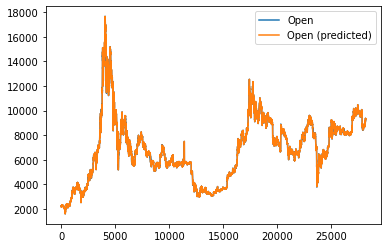

In [71]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.dates import drange

plt.plot(dataframe.index[::-1], dataframe["Open"], label="Open")
plt.plot(dataframe.index[::-1], dataframe["Open_predicted"], label="Open (predicted)")

plt.legend()

plt.show()